In [1]:
import pandas as pd # import library
import numpy as np # import lib
import statistics as st
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ccc=pd.read_csv(r'/home/tharaka/kagglecompetition/data-storm-20/Hotel-A-train.csv')


IndentationError: unexpected indent (<ipython-input-1-31f14e43541e>, line 13)

In [2]:
import pandas as pd # import library
import numpy as np # import lib
import statistics as st
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [3]:
ccc=pd.read_csv(r'/home/tharaka/kagglecompetition/data-storm-20/Hotel-A-train.csv')
dataset=pd.DataFrame(ccc)
dataset

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,...,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144
4,77222321,F,62,Latino,High-School,25K --50K,East,Resort,7/3/2015,7/4/2015,...,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,F,49,African American,Mid-School,<25K,West,City Hotel,8/31/2016,9/1/2016,...,HB,Yes,Yes,No Deposit,Online,Yes,Check-In,Yes,10,100
27495,56414525,F,49,Asian American,College,25K --50K,South,Airport Hotels,8/31/2016,9/1/2016,...,BB,No,No,Refundable,Agent,Yes,No-Show,Yes,40,194
27496,52023375,F,49,Latino,High-School,50K -- 100K,South,Airport Hotels,9/1/2016,9/2/2016,...,HB,No,No,No Deposit,Direct,Yes,Check-In,Yes,5,202
27497,98041387,M,65,African American,College,25K --50K,South,Airport Hotels,8/31/2016,9/1/2016,...,FB,No,No,No Deposit,Online,No,Canceled,Yes,20,157


In [4]:


# Shape of training data (num_rows, num_columns)
print(dataset.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (dataset.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])



(27499, 24)
Series([], dtype: int64)


In [5]:
dataset['Expected_checkin'].dtype

dtype('O')

In [6]:
dataset['Expected_checkout'].dtype

dtype('O')

In [7]:
dataset2=dataset
dataset2

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,...,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144
4,77222321,F,62,Latino,High-School,25K --50K,East,Resort,7/3/2015,7/4/2015,...,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,F,49,African American,Mid-School,<25K,West,City Hotel,8/31/2016,9/1/2016,...,HB,Yes,Yes,No Deposit,Online,Yes,Check-In,Yes,10,100
27495,56414525,F,49,Asian American,College,25K --50K,South,Airport Hotels,8/31/2016,9/1/2016,...,BB,No,No,Refundable,Agent,Yes,No-Show,Yes,40,194
27496,52023375,F,49,Latino,High-School,50K -- 100K,South,Airport Hotels,9/1/2016,9/2/2016,...,HB,No,No,No Deposit,Direct,Yes,Check-In,Yes,5,202
27497,98041387,M,65,African American,College,25K --50K,South,Airport Hotels,8/31/2016,9/1/2016,...,FB,No,No,No Deposit,Online,No,Canceled,Yes,20,157


In [8]:
print(dataset['Expected_checkout'].head())

0    7/2/2015
1    7/2/2015
2    7/6/2015
3    7/3/2015
4    7/4/2015
Name: Expected_checkout, dtype: object


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

dataset2['Expected_checkin'] = pd.to_datetime(dataset2['Expected_checkin'], infer_datetime_format=True)
dataset2['Expected_checkout'] = pd.to_datetime(dataset2['Expected_checkout'], infer_datetime_format=True)
dataset2['Booking_date'] = pd.to_datetime(dataset2['Booking_date'], infer_datetime_format=True)
dataset2

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,2015-07-01,2015-07-02,...,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,2015-07-01,2015-07-02,...,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,2015-07-02,2015-07-06,...,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,2015-07-02,2015-07-03,...,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144
4,77222321,F,62,Latino,High-School,25K --50K,East,Resort,2015-07-03,2015-07-04,...,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,F,49,African American,Mid-School,<25K,West,City Hotel,2016-08-31,2016-09-01,...,HB,Yes,Yes,No Deposit,Online,Yes,Check-In,Yes,10,100
27495,56414525,F,49,Asian American,College,25K --50K,South,Airport Hotels,2016-08-31,2016-09-01,...,BB,No,No,Refundable,Agent,Yes,No-Show,Yes,40,194
27496,52023375,F,49,Latino,High-School,50K -- 100K,South,Airport Hotels,2016-09-01,2016-09-02,...,HB,No,No,No Deposit,Direct,Yes,Check-In,Yes,5,202
27497,98041387,M,65,African American,College,25K --50K,South,Airport Hotels,2016-08-31,2016-09-01,...,FB,No,No,No Deposit,Online,No,Canceled,Yes,20,157


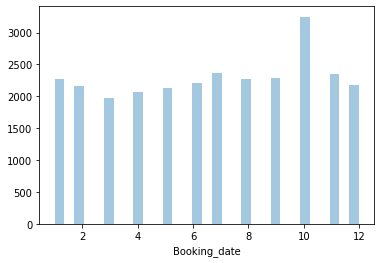

In [10]:
sns.distplot(dataset2['Booking_date'].dt.month, kde=False, bins=31)


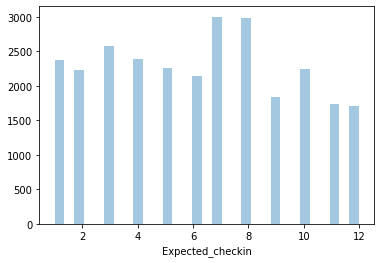

In [11]:
sns.distplot(dataset2['Expected_checkin'].dt.month, kde=False, bins=31)


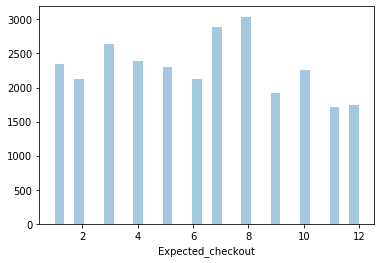

In [12]:
sns.distplot(dataset2['Expected_checkout'].dt.month, kde=False, bins=31)

In [13]:
#Duration of hotel stay
dataset2['Duration']=dataset2['Expected_checkout']-dataset2['Expected_checkin']
#Arrival Duration
dataset2['Arrival_Duration']=dataset2['Expected_checkin']-dataset2['Booking_date']
#Full_trip_duration
dataset2['Full_trip_duration']=dataset2['Expected_checkout']-dataset2['Booking_date']
dataset2['Full_trip_duration']

0        42 days
1        37 days
2         7 days
3        13 days
4        14 days
          ...   
27494    38 days
27495   128 days
27496    10 days
27497    99 days
27498    66 days
Name: Full_trip_duration, Length: 27499, dtype: timedelta64[ns]

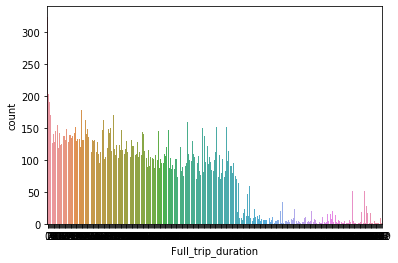

In [14]:

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns





index
a = dataset2.Full_trip_duration.dt.days
a
sns.countplot(x=a,data=dataset2)

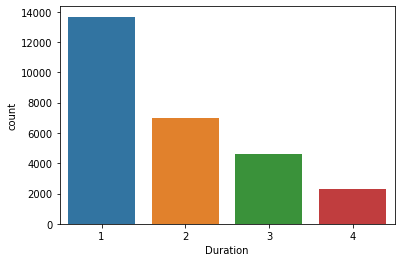

In [15]:

b = dataset2.Duration.dt.days
b
sns.countplot(x=b,data=dataset2)

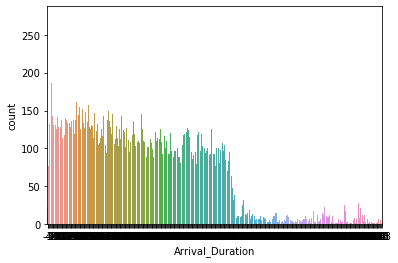

In [16]:
c = dataset2.Arrival_Duration.dt.days
c
sns.countplot(x=c,data=dataset2)

In [17]:
#Checkin 1
#No show 0
#Cancel 2
dataset2.loc[dataset2['Reservation_Status']=='Check-In','target']=1
dataset2.loc[dataset2['Reservation_Status']=='No-Show','target']=0
dataset2.loc[dataset2['Reservation_Status']=='Canceled','target']=2


In [18]:
dataset2['target']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
27494    1.0
27495    0.0
27496    1.0
27497    2.0
27498    0.0
Name: target, Length: 27499, dtype: float64

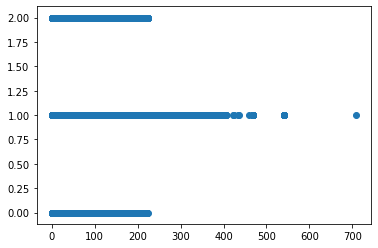

In [19]:

plt.scatter(a,dataset2.target.values)


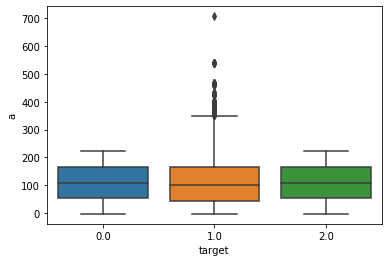

In [20]:
dataset2['a'] = dataset2.Arrival_Duration.dt.days
sns.boxplot(x="target",y="a",data=dataset2)

## Here we can say that if arrival rate is high if the arrival duration is high,i.e booked a long time earlier means he/she comes for sure

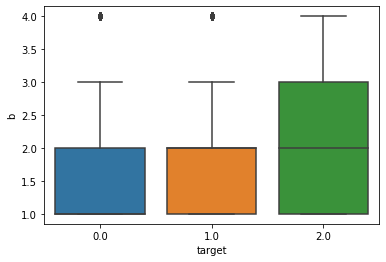

In [21]:
dataset2['b'] = dataset2.Duration.dt.days
sns.boxplot(x="target",y="b",data=dataset2)

## we remove all the dates and use only duration as a feature from this point onwards

In [22]:
dataset2['sex']=pd.get_dummies(dataset2["Gender"],drop_first=True)
dataset2['sex']

0        0
1        0
2        0
3        1
4        0
        ..
27494    0
27495    0
27496    0
27497    1
27498    0
Name: sex, Length: 27499, dtype: uint8

# Check uniques to clean the data

In [23]:
tab1 = dataset['Reservation_Status'].unique()

# sort them alphabetically and then take a closer look
tab1.sort()
tab1

array(['Canceled', 'Check-In', 'No-Show'], dtype=object)

In [24]:
tab2 = dataset['Ethnicity'].unique()

# sort them alphabetically and then take a closer look
tab2.sort()
tab2


array(['African American', 'Asian American', 'Latino', 'caucasian'],
      dtype=object)

In [25]:
tab3 = dataset['Gender'].unique()

# sort them alphabetically and then take a closer look
tab3.sort()
tab3


array(['F', 'M'], dtype=object)

In [26]:
tab4 = dataset['Educational_Level'].unique()

# sort them alphabetically and then take a closer look
tab4.sort()
tab4


array(['College', 'Grad', 'High-School', 'Mid-School'], dtype=object)

In [27]:
tab5 = dataset['Income'].unique()

# sort them alphabetically and then take a closer look
tab5.sort()
tab5

array(['25K --50K', '50K -- 100K', '<25K', '>100K'], dtype=object)

In [28]:

tab6 = dataset['Country_region'].unique()

# sort them alphabetically and then take a closer look
tab6.sort()
tab6

array(['East', 'North', 'South', 'West'], dtype=object)

In [29]:

tab7 = dataset['Hotel_Type'].unique()

# sort them alphabetically and then take a closer look
tab7.sort()
tab7

array(['Airport Hotels', 'City Hotel', 'Resort'], dtype=object)

In [30]:

tab8 = dataset['Meal_Type'].unique()

# sort them alphabetically and then take a closer look
tab8.sort()
tab8

array(['BB', 'FB', 'HB'], dtype=object)

In [31]:

tab9 = dataset['Visted_Previously'].unique()

# sort them alphabetically and then take a closer look
tab9.sort()
tab9

array(['No', 'Yes'], dtype=object)

In [32]:


tab10 = dataset['Previous_Cancellations'].unique()

# sort them alphabetically and then take a closer look
tab10.sort()
tab10


array(['No', 'Yes'], dtype=object)

In [33]:

tab10 = dataset['Deposit_type'].unique()

# sort them alphabetically and then take a closer look
tab10.sort()
tab10


array(['No Deposit', 'Non-Refundable', 'Refundable'], dtype=object)

In [34]:

tab10 = dataset['Booking_channel'].unique()

# sort them alphabetically and then take a closer look
tab10.sort()
tab10


array(['Agent', 'Direct', 'Online'], dtype=object)

In [35]:


tab10 = dataset['Required_Car_Parking'].unique()

# sort them alphabetically and then take a closer look
tab10.sort()
tab10


array(['No', 'Yes'], dtype=object)

In [36]:

tab11 = dataset['Use_Promotion'].unique()

# sort them alphabetically and then take a closer look
tab11.sort()
tab11


array(['No', 'Yes'], dtype=object)

## No any need to clean the data since wordings are correct

In [37]:
dataset2.loc[dataset2['Ethnicity']=='Latino','Ethnicity']=0
dataset2.loc[dataset2['Ethnicity']=='caucasian','Ethnicity']=1
dataset2.loc[dataset2['Ethnicity']=='African American','Ethnicity']=2
dataset2.loc[dataset2['Ethnicity']=='Asian American','Ethnicity']=3
dataset2

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Use_Promotion,Discount_Rate,Room_Rate,Duration,Arrival_Duration,Full_trip_duration,target,a,b,sex
0,39428300,F,40,0,Grad,<25K,North,City Hotel,2015-07-01,2015-07-02,...,Yes,10,218,1 days,41 days,42 days,1.0,41,1,0
1,77491756,F,49,0,Mid-School,50K -- 100K,East,City Hotel,2015-07-01,2015-07-02,...,No,0,185,1 days,36 days,37 days,1.0,36,1,0
2,73747291,F,42,1,Grad,<25K,East,City Hotel,2015-07-02,2015-07-06,...,No,0,119,4 days,3 days,7 days,1.0,3,4,0
3,67301739,M,25,2,College,>100K,South,Airport Hotels,2015-07-02,2015-07-03,...,Yes,5,144,1 days,12 days,13 days,1.0,12,1,1
4,77222321,F,62,0,High-School,25K --50K,East,Resort,2015-07-03,2015-07-04,...,Yes,10,242,1 days,13 days,14 days,1.0,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,F,49,2,Mid-School,<25K,West,City Hotel,2016-08-31,2016-09-01,...,Yes,10,100,1 days,37 days,38 days,1.0,37,1,0
27495,56414525,F,49,3,College,25K --50K,South,Airport Hotels,2016-08-31,2016-09-01,...,Yes,40,194,1 days,127 days,128 days,0.0,127,1,0
27496,52023375,F,49,0,High-School,50K -- 100K,South,Airport Hotels,2016-09-01,2016-09-02,...,Yes,5,202,1 days,9 days,10 days,1.0,9,1,0
27497,98041387,M,65,2,College,25K --50K,South,Airport Hotels,2016-08-31,2016-09-01,...,Yes,20,157,1 days,98 days,99 days,2.0,98,1,1


In [38]:
dataset2

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Use_Promotion,Discount_Rate,Room_Rate,Duration,Arrival_Duration,Full_trip_duration,target,a,b,sex
0,39428300,F,40,0,Grad,<25K,North,City Hotel,2015-07-01,2015-07-02,...,Yes,10,218,1 days,41 days,42 days,1.0,41,1,0
1,77491756,F,49,0,Mid-School,50K -- 100K,East,City Hotel,2015-07-01,2015-07-02,...,No,0,185,1 days,36 days,37 days,1.0,36,1,0
2,73747291,F,42,1,Grad,<25K,East,City Hotel,2015-07-02,2015-07-06,...,No,0,119,4 days,3 days,7 days,1.0,3,4,0
3,67301739,M,25,2,College,>100K,South,Airport Hotels,2015-07-02,2015-07-03,...,Yes,5,144,1 days,12 days,13 days,1.0,12,1,1
4,77222321,F,62,0,High-School,25K --50K,East,Resort,2015-07-03,2015-07-04,...,Yes,10,242,1 days,13 days,14 days,1.0,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,F,49,2,Mid-School,<25K,West,City Hotel,2016-08-31,2016-09-01,...,Yes,10,100,1 days,37 days,38 days,1.0,37,1,0
27495,56414525,F,49,3,College,25K --50K,South,Airport Hotels,2016-08-31,2016-09-01,...,Yes,40,194,1 days,127 days,128 days,0.0,127,1,0
27496,52023375,F,49,0,High-School,50K -- 100K,South,Airport Hotels,2016-09-01,2016-09-02,...,Yes,5,202,1 days,9 days,10 days,1.0,9,1,0
27497,98041387,M,65,2,College,25K --50K,South,Airport Hotels,2016-08-31,2016-09-01,...,Yes,20,157,1 days,98 days,99 days,2.0,98,1,1


In [39]:
dataset2['Gender']=pd.get_dummies(dataset2["Gender"],drop_first=True)
dataset2

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Use_Promotion,Discount_Rate,Room_Rate,Duration,Arrival_Duration,Full_trip_duration,target,a,b,sex
0,39428300,0,40,0,Grad,<25K,North,City Hotel,2015-07-01,2015-07-02,...,Yes,10,218,1 days,41 days,42 days,1.0,41,1,0
1,77491756,0,49,0,Mid-School,50K -- 100K,East,City Hotel,2015-07-01,2015-07-02,...,No,0,185,1 days,36 days,37 days,1.0,36,1,0
2,73747291,0,42,1,Grad,<25K,East,City Hotel,2015-07-02,2015-07-06,...,No,0,119,4 days,3 days,7 days,1.0,3,4,0
3,67301739,1,25,2,College,>100K,South,Airport Hotels,2015-07-02,2015-07-03,...,Yes,5,144,1 days,12 days,13 days,1.0,12,1,1
4,77222321,0,62,0,High-School,25K --50K,East,Resort,2015-07-03,2015-07-04,...,Yes,10,242,1 days,13 days,14 days,1.0,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,0,49,2,Mid-School,<25K,West,City Hotel,2016-08-31,2016-09-01,...,Yes,10,100,1 days,37 days,38 days,1.0,37,1,0
27495,56414525,0,49,3,College,25K --50K,South,Airport Hotels,2016-08-31,2016-09-01,...,Yes,40,194,1 days,127 days,128 days,0.0,127,1,0
27496,52023375,0,49,0,High-School,50K -- 100K,South,Airport Hotels,2016-09-01,2016-09-02,...,Yes,5,202,1 days,9 days,10 days,1.0,9,1,0
27497,98041387,1,65,2,College,25K --50K,South,Airport Hotels,2016-08-31,2016-09-01,...,Yes,20,157,1 days,98 days,99 days,2.0,98,1,1


In [40]:
dataset2.loc[dataset2['Income']=='25K --50K','Income']=0
dataset2.loc[dataset2['Income']=='50K -- 100K','Income']=1
dataset2.loc[dataset2['Income']=='<25K','Income']=2
dataset2.loc[dataset2['Income']=='>100K','Income']=3
dataset2


,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Use_Promotion,Discount_Rate,Room_Rate,Duration,Arrival_Duration,Full_trip_duration,target,a,b,sex
0,39428300,0,40,0,Grad,2,North,City Hotel,2015-07-01,2015-07-02,...,Yes,10,218,1 days,41 days,42 days,1.0,41,1,0
1,77491756,0,49,0,Mid-School,1,East,City Hotel,2015-07-01,2015-07-02,...,No,0,185,1 days,36 days,37 days,1.0,36,1,0
2,73747291,0,42,1,Grad,2,East,City Hotel,2015-07-02,2015-07-06,...,No,0,119,4 days,3 days,7 days,1.0,3,4,0
3,67301739,1,25,2,College,3,South,Airport Hotels,2015-07-02,2015-07-03,...,Yes,5,144,1 days,12 days,13 days,1.0,12,1,1
4,77222321,0,62,0,High-School,0,East,Resort,2015-07-03,2015-07-04,...,Yes,10,242,1 days,13 days,14 days,1.0,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,0,49,2,Mid-School,2,West,City Hotel,2016-08-31,2016-09-01,...,Yes,10,100,1 days,37 days,38 days,1.0,37,1,0
27495,56414525,0,49,3,College,0,South,Airport Hotels,2016-08-31,2016-09-01,...,Yes,40,194,1 days,127 days,128 days,0.0,127,1,0
27496,52023375,0,49,0,High-School,1,South,Airport Hotels,2016-09-01,2016-09-02,...,Yes,5,202,1 days,9 days,10 days,1.0,9,1,0
27497,98041387,1,65,2,College,0,South,Airport Hotels,2016-08-31,2016-09-01,...,Yes,20,157,1 days,98 days,99 days,2.0,98,1,1


In [41]:
dataset2.loc[dataset2['Educational_Level']=='Mid-School','Educational_Level']=0
dataset2.loc[dataset2['Educational_Level']=='High-School','Educational_Level']=1
dataset2.loc[dataset2['Educational_Level']=='College','Educational_Level']= 2
dataset2.loc[dataset2['Educational_Level']=='Grad','Educational_Level']=3

In [42]:
dataset2.loc[dataset2['Country_region']=='North','Country_region']=0
dataset2.loc[dataset2['Country_region']=='East','Country_region']=1
dataset2.loc[dataset2['Country_region']=='South','Country_region']=2
dataset2.loc[dataset2['Country_region']=='West','Country_region']=3
dataset2

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Use_Promotion,Discount_Rate,Room_Rate,Duration,Arrival_Duration,Full_trip_duration,target,a,b,sex
0,39428300,0,40,0,3,2,0,City Hotel,2015-07-01,2015-07-02,...,Yes,10,218,1 days,41 days,42 days,1.0,41,1,0
1,77491756,0,49,0,0,1,1,City Hotel,2015-07-01,2015-07-02,...,No,0,185,1 days,36 days,37 days,1.0,36,1,0
2,73747291,0,42,1,3,2,1,City Hotel,2015-07-02,2015-07-06,...,No,0,119,4 days,3 days,7 days,1.0,3,4,0
3,67301739,1,25,2,2,3,2,Airport Hotels,2015-07-02,2015-07-03,...,Yes,5,144,1 days,12 days,13 days,1.0,12,1,1
4,77222321,0,62,0,1,0,1,Resort,2015-07-03,2015-07-04,...,Yes,10,242,1 days,13 days,14 days,1.0,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,0,49,2,0,2,3,City Hotel,2016-08-31,2016-09-01,...,Yes,10,100,1 days,37 days,38 days,1.0,37,1,0
27495,56414525,0,49,3,2,0,2,Airport Hotels,2016-08-31,2016-09-01,...,Yes,40,194,1 days,127 days,128 days,0.0,127,1,0
27496,52023375,0,49,0,1,1,2,Airport Hotels,2016-09-01,2016-09-02,...,Yes,5,202,1 days,9 days,10 days,1.0,9,1,0
27497,98041387,1,65,2,2,0,2,Airport Hotels,2016-08-31,2016-09-01,...,Yes,20,157,1 days,98 days,99 days,2.0,98,1,1


In [43]:

dataset2.loc[dataset2['Visted_Previously']=='Yes','Visted_Previously']=1
dataset2.loc[dataset2['Visted_Previously']=='No','Visted_Previously']=0

dataset2

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Use_Promotion,Discount_Rate,Room_Rate,Duration,Arrival_Duration,Full_trip_duration,target,a,b,sex
0,39428300,0,40,0,3,2,0,City Hotel,2015-07-01,2015-07-02,...,Yes,10,218,1 days,41 days,42 days,1.0,41,1,0
1,77491756,0,49,0,0,1,1,City Hotel,2015-07-01,2015-07-02,...,No,0,185,1 days,36 days,37 days,1.0,36,1,0
2,73747291,0,42,1,3,2,1,City Hotel,2015-07-02,2015-07-06,...,No,0,119,4 days,3 days,7 days,1.0,3,4,0
3,67301739,1,25,2,2,3,2,Airport Hotels,2015-07-02,2015-07-03,...,Yes,5,144,1 days,12 days,13 days,1.0,12,1,1
4,77222321,0,62,0,1,0,1,Resort,2015-07-03,2015-07-04,...,Yes,10,242,1 days,13 days,14 days,1.0,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,0,49,2,0,2,3,City Hotel,2016-08-31,2016-09-01,...,Yes,10,100,1 days,37 days,38 days,1.0,37,1,0
27495,56414525,0,49,3,2,0,2,Airport Hotels,2016-08-31,2016-09-01,...,Yes,40,194,1 days,127 days,128 days,0.0,127,1,0
27496,52023375,0,49,0,1,1,2,Airport Hotels,2016-09-01,2016-09-02,...,Yes,5,202,1 days,9 days,10 days,1.0,9,1,0
27497,98041387,1,65,2,2,0,2,Airport Hotels,2016-08-31,2016-09-01,...,Yes,20,157,1 days,98 days,99 days,2.0,98,1,1


In [44]:
dataset2.loc[dataset2['Hotel_Type']=='City Hotel','Hotel_Type']=0
dataset2.loc[dataset2['Hotel_Type']=='Airport Hotels','Hotel_Type']=1
dataset2.loc[dataset2['Hotel_Type']=='Resort','Hotel_Type']=2

In [45]:
dataset2.loc[dataset2['Meal_Type']=='BB','Meal_Type']=0
dataset2.loc[dataset2['Meal_Type']=='FB','Meal_Type']=1
dataset2.loc[dataset2['Meal_Type']=='HB','Meal_Type']=2

In [46]:

dataset2.loc[dataset2['Booking_channel']=='Agent','Booking_channel']=0
dataset2.loc[dataset2['Booking_channel']=='Direct','Booking_channel']=1
dataset2.loc[dataset2['Booking_channel']=='Online','Booking_channel']=2

In [47]:
dataset2.loc[dataset2['Previous_Cancellations']=='No','Previous_Cancellations']=0
dataset2.loc[dataset2['Previous_Cancellations']=='Yes','Previous_Cancellations']=1

In [48]:
dataset2.loc[dataset2['Deposit_type']=='No Deposit','Deposit_type']=0
dataset2.loc[dataset2['Deposit_type']=='Refundable','Deposit_type']=1
dataset2.loc[dataset2['Deposit_type']=='Non-Refundable','Deposit_type']=2

In [49]:
dataset2

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Use_Promotion,Discount_Rate,Room_Rate,Duration,Arrival_Duration,Full_trip_duration,target,a,b,sex
0,39428300,0,40,0,3,2,0,0,2015-07-01,2015-07-02,...,Yes,10,218,1 days,41 days,42 days,1.0,41,1,0
1,77491756,0,49,0,0,1,1,0,2015-07-01,2015-07-02,...,No,0,185,1 days,36 days,37 days,1.0,36,1,0
2,73747291,0,42,1,3,2,1,0,2015-07-02,2015-07-06,...,No,0,119,4 days,3 days,7 days,1.0,3,4,0
3,67301739,1,25,2,2,3,2,1,2015-07-02,2015-07-03,...,Yes,5,144,1 days,12 days,13 days,1.0,12,1,1
4,77222321,0,62,0,1,0,1,2,2015-07-03,2015-07-04,...,Yes,10,242,1 days,13 days,14 days,1.0,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,0,49,2,0,2,3,0,2016-08-31,2016-09-01,...,Yes,10,100,1 days,37 days,38 days,1.0,37,1,0
27495,56414525,0,49,3,2,0,2,1,2016-08-31,2016-09-01,...,Yes,40,194,1 days,127 days,128 days,0.0,127,1,0
27496,52023375,0,49,0,1,1,2,1,2016-09-01,2016-09-02,...,Yes,5,202,1 days,9 days,10 days,1.0,9,1,0
27497,98041387,1,65,2,2,0,2,1,2016-08-31,2016-09-01,...,Yes,20,157,1 days,98 days,99 days,2.0,98,1,1


In [50]:

dataset2.loc[dataset2['Use_Promotion']=='No','Use_Promotion']=0
dataset2.loc[dataset2['Use_Promotion']=='Yes','Use_Promotion']=1

In [51]:
dataset2.loc[dataset2['Required_Car_Parking']=='No','Required_Car_Parking']=0
dataset2.loc[dataset2['Required_Car_Parking']=='Yes','Required_Car_Parking']=1

In [52]:
dataset2

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Use_Promotion,Discount_Rate,Room_Rate,Duration,Arrival_Duration,Full_trip_duration,target,a,b,sex
0,39428300,0,40,0,3,2,0,0,2015-07-01,2015-07-02,...,1,10,218,1 days,41 days,42 days,1.0,41,1,0
1,77491756,0,49,0,0,1,1,0,2015-07-01,2015-07-02,...,0,0,185,1 days,36 days,37 days,1.0,36,1,0
2,73747291,0,42,1,3,2,1,0,2015-07-02,2015-07-06,...,0,0,119,4 days,3 days,7 days,1.0,3,4,0
3,67301739,1,25,2,2,3,2,1,2015-07-02,2015-07-03,...,1,5,144,1 days,12 days,13 days,1.0,12,1,1
4,77222321,0,62,0,1,0,1,2,2015-07-03,2015-07-04,...,1,10,242,1 days,13 days,14 days,1.0,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,0,49,2,0,2,3,0,2016-08-31,2016-09-01,...,1,10,100,1 days,37 days,38 days,1.0,37,1,0
27495,56414525,0,49,3,2,0,2,1,2016-08-31,2016-09-01,...,1,40,194,1 days,127 days,128 days,0.0,127,1,0
27496,52023375,0,49,0,1,1,2,1,2016-09-01,2016-09-02,...,1,5,202,1 days,9 days,10 days,1.0,9,1,0
27497,98041387,1,65,2,2,0,2,1,2016-08-31,2016-09-01,...,1,20,157,1 days,98 days,99 days,2.0,98,1,1


In [53]:
df2 = dataset2.drop(['Reservation-id','Expected_checkin','Expected_checkout','Booking_date','Arrival_Duration','Duration','Full_trip_duration','b'],axis =1)
df2

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,...,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,target,a,sex
0,0,40,0,3,2,0,0,2,2,0,...,0,2,1,Check-In,1,10,218,1.0,41,0
1,0,49,0,0,1,1,0,3,3,0,...,1,2,1,Check-In,0,0,185,1.0,36,0
2,0,42,1,3,2,1,0,3,3,0,...,0,2,1,Check-In,0,0,119,1.0,3,0
3,1,25,2,2,3,2,1,4,3,0,...,1,0,1,Check-In,1,5,144,1.0,12,1
4,0,62,0,1,0,1,2,1,1,0,...,0,1,0,Check-In,1,10,242,1.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,0,49,2,0,2,3,0,1,2,1,...,0,2,1,Check-In,1,10,100,1.0,37,0
27495,0,49,3,2,0,2,1,2,1,0,...,1,0,1,No-Show,1,40,194,0.0,127,0
27496,0,49,0,1,1,2,1,2,1,1,...,0,1,1,Check-In,1,5,202,1.0,9,0
27497,1,65,2,2,0,2,1,3,2,0,...,0,2,0,Canceled,1,20,157,2.0,98,1


In [54]:
df2['Reservation_Status']=df2['target']
df2=df2.drop(['target'],axis=1)


In [55]:
df2

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,...,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,a,sex
0,0,40,0,3,2,0,0,2,2,0,...,0,0,2,1,1.0,1,10,218,41,0
1,0,49,0,0,1,1,0,3,3,0,...,0,1,2,1,1.0,0,0,185,36,0
2,0,42,1,3,2,1,0,3,3,0,...,0,0,2,1,1.0,0,0,119,3,0
3,1,25,2,2,3,2,1,4,3,0,...,0,1,0,1,1.0,1,5,144,12,1
4,0,62,0,1,0,1,2,1,1,0,...,0,0,1,0,1.0,1,10,242,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,0,49,2,0,2,3,0,1,2,1,...,1,0,2,1,1.0,1,10,100,37,0
27495,0,49,3,2,0,2,1,2,1,0,...,0,1,0,1,0.0,1,40,194,127,0
27496,0,49,0,1,1,2,1,2,1,1,...,0,0,1,1,1.0,1,5,202,9,0
27497,1,65,2,2,0,2,1,3,2,0,...,0,0,2,0,2.0,1,20,157,98,1


In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  27499 non-null  uint8  
 1   Age                     27499 non-null  int64  
 2   Ethnicity               27499 non-null  object 
 3   Educational_Level       27499 non-null  object 
 4   Income                  27499 non-null  object 
 5   Country_region          27499 non-null  object 
 6   Hotel_Type              27499 non-null  object 
 7   Adults                  27499 non-null  int64  
 8   Children                27499 non-null  int64  
 9   Babies                  27499 non-null  int64  
 10  Meal_Type               27499 non-null  object 
 11  Visted_Previously       27499 non-null  object 
 12  Previous_Cancellations  27499 non-null  object 
 13  Deposit_type            27499 non-null  object 
 14  Booking_channel         27499 non-null

In [57]:
X1=df2.drop(['Reservation_Status','Educational_Level','Income','Country_region','Hotel_Type','Meal_Type','Visted_Previously','Previous_Cancellations','Deposit_type','Booking_channel','Required_Car_Parking','Use_Promotion'],axis=1)
scaler=StandardScaler()
scaler.fit(X1)
scaled_data=scaler.transform(X1)
pca = PCA(n_components=8)
pc_train = pca.fit_transform(X1)
pc_train


array([[ -68.79363403,  -43.07844029,    3.82012137, ...,   -1.49936293,
           0.17972353,    0.73396042],
       [ -73.89132167,  -10.10469677,   -5.09216489, ...,   -1.45457698,
           1.17377409,    0.83009968],
       [-107.11140871,   55.7931502 ,    1.8299257 , ...,   -0.46518845,
           1.17616927,    0.83196019],
       ...,
       [-100.8290482 ,  -27.18146444,   -5.21113437, ...,   -1.49634112,
          -0.81935827,    0.61822748],
       [ -11.89858269,   18.11088491,  -21.1234039 , ...,    0.52035496,
           0.32289369,   -0.66848661],
       [ -44.81712732,  -35.01527838,   -4.01962629, ...,   -0.46250161,
          -0.82105686,    0.6314325 ]])

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X1, df2['Reservation_Status'], test_size = 0.2, random_state =1)

model = svm.SVC(kernel='sigmoid').fit(X_train,y_train)
from sklearn.metrics import confusion_matrix

linear_pred = model.predict(X_test)
cm_lin = confusion_matrix(y_test, linear_pred)
print(cm_lin)
accuracy_lin = linear_pred.score(X_test, y_test)
print(accuracy_lin)

[[  84  325    0]
 [1023 3298    0]
 [ 180  590    0]]


AttributeError: 'numpy.ndarray' object has no attribute 'score'

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X1, df2['Reservation_Status'], test_size = 0.2, random_state =1)
from sklearn.ensemble import AdaBoostClassifier
AdaBoost=AdaBoostClassifier(base_estimator=model,n_estimators=400,learning_rate=1)

boostmodel=AdaBoost.fit(X_train,y_train)
y_pred=boostmodel.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

TypeError: AdaBoostClassifier with algorithm='SAMME.R' requires that the weak learner supports the calculation of class probabilities with a predict_proba method.
Please change the base estimator or set algorithm='SAMME' instead.

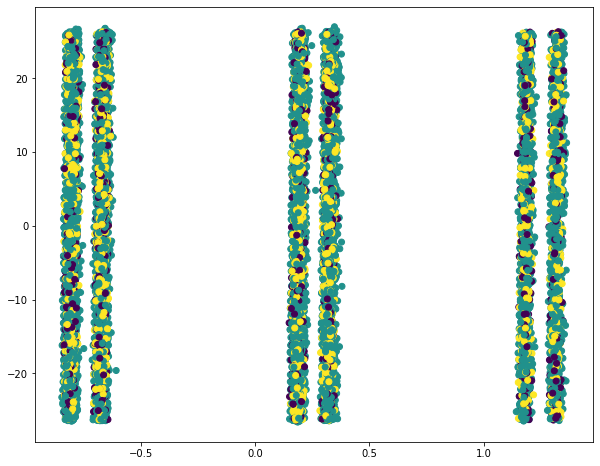

In [60]:
plt.figure(figsize=(10,8))
plt.scatter(pc_train[:,6],pc_train[:,2],c=df2['Reservation_Status'])


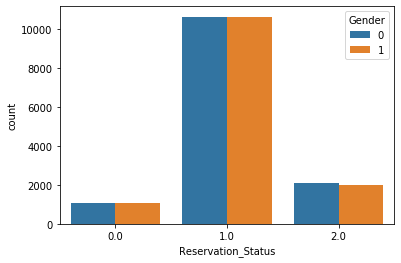

In [61]:
sns.countplot(x="Reservation_Status",hue="Gender",data=df2)

# Therefore we can say that Male Female Feature is not needed


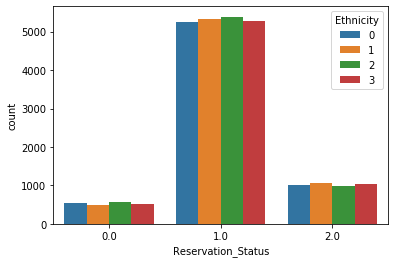

In [62]:
sns.countplot(x="Reservation_Status",hue="Ethnicity",data=df2)

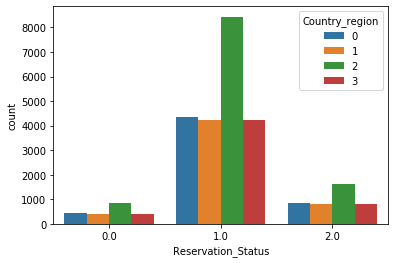

In [63]:
sns.countplot(x="Reservation_Status",hue="Country_region",data=df2)

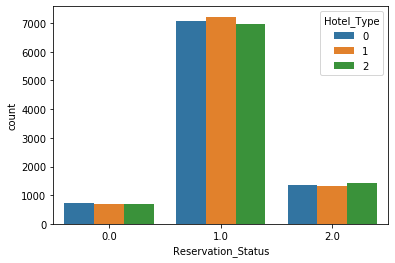

In [64]:
sns.countplot(x="Reservation_Status",hue="Hotel_Type",data=df2)

In [65]:
from sklearn.ensemble import RandomForestClassifier
X2=df2.drop(['Reservation_Status'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X2, df2['Reservation_Status'], test_size = 0.2, random_state =1)
clf = RandomForestClassifier(n_estimators=1000)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

0.7856363636363637
[[   0  408    1]
 [   0 4321    0]
 [   0  770    0]]


In [66]:
dataset2

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Use_Promotion,Discount_Rate,Room_Rate,Duration,Arrival_Duration,Full_trip_duration,target,a,b,sex
0,39428300,0,40,0,3,2,0,0,2015-07-01,2015-07-02,...,1,10,218,1 days,41 days,42 days,1.0,41,1,0
1,77491756,0,49,0,0,1,1,0,2015-07-01,2015-07-02,...,0,0,185,1 days,36 days,37 days,1.0,36,1,0
2,73747291,0,42,1,3,2,1,0,2015-07-02,2015-07-06,...,0,0,119,4 days,3 days,7 days,1.0,3,4,0
3,67301739,1,25,2,2,3,2,1,2015-07-02,2015-07-03,...,1,5,144,1 days,12 days,13 days,1.0,12,1,1
4,77222321,0,62,0,1,0,1,2,2015-07-03,2015-07-04,...,1,10,242,1 days,13 days,14 days,1.0,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,0,49,2,0,2,3,0,2016-08-31,2016-09-01,...,1,10,100,1 days,37 days,38 days,1.0,37,1,0
27495,56414525,0,49,3,2,0,2,1,2016-08-31,2016-09-01,...,1,40,194,1 days,127 days,128 days,0.0,127,1,0
27496,52023375,0,49,0,1,1,2,1,2016-09-01,2016-09-02,...,1,5,202,1 days,9 days,10 days,1.0,9,1,0
27497,98041387,1,65,2,2,0,2,1,2016-08-31,2016-09-01,...,1,20,157,1 days,98 days,99 days,2.0,98,1,1


In [67]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Reservation-id          27499 non-null  int64          
 1   Gender                  27499 non-null  uint8          
 2   Age                     27499 non-null  int64          
 3   Ethnicity               27499 non-null  object         
 4   Educational_Level       27499 non-null  object         
 5   Income                  27499 non-null  object         
 6   Country_region          27499 non-null  object         
 7   Hotel_Type              27499 non-null  object         
 8   Expected_checkin        27499 non-null  datetime64[ns] 
 9   Expected_checkout       27499 non-null  datetime64[ns] 
 10  Booking_date            27499 non-null  datetime64[ns] 
 11  Adults                  27499 non-null  int64          
 12  Children                27499 no

In [68]:
dataf=pd.read_csv(r'/home/tharaka/kagglecompetition/data-storm-20/Hotel-A-train.csv')
dataf=dataf.drop(['Reservation-id','Gender','Reservation_Status','Expected_checkin','Expected_checkout','Booking_date'],axis=1)
dataf['a']=dataset2['a']
dataf

,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,a
0,40,Latino,Grad,<25K,North,City Hotel,2,2,0,BB,No,No,No Deposit,Online,Yes,Yes,10,218,41
1,49,Latino,Mid-School,50K -- 100K,East,City Hotel,3,3,0,BB,No,No,Refundable,Online,Yes,No,0,185,36
2,42,caucasian,Grad,<25K,East,City Hotel,3,3,0,BB,No,No,No Deposit,Online,Yes,No,0,119,3
3,25,African American,College,>100K,South,Airport Hotels,4,3,0,BB,No,No,Refundable,Agent,Yes,Yes,5,144,12
4,62,Latino,High-School,25K --50K,East,Resort,1,1,0,BB,No,No,No Deposit,Direct,No,Yes,10,242,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,49,African American,Mid-School,<25K,West,City Hotel,1,2,1,HB,Yes,Yes,No Deposit,Online,Yes,Yes,10,100,37
27495,49,Asian American,College,25K --50K,South,Airport Hotels,2,1,0,BB,No,No,Refundable,Agent,Yes,Yes,40,194,127
27496,49,Latino,High-School,50K -- 100K,South,Airport Hotels,2,1,1,HB,No,No,No Deposit,Direct,Yes,Yes,5,202,9
27497,65,African American,College,25K --50K,South,Airport Hotels,3,2,0,FB,No,No,No Deposit,Online,No,Yes,20,157,98


In [69]:
X_train=dataf
y_train=dataset2['target']
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     27499 non-null  int64 
 1   Ethnicity               27499 non-null  object
 2   Educational_Level       27499 non-null  object
 3   Income                  27499 non-null  object
 4   Country_region          27499 non-null  object
 5   Hotel_Type              27499 non-null  object
 6   Adults                  27499 non-null  int64 
 7   Children                27499 non-null  int64 
 8   Babies                  27499 non-null  int64 
 9   Meal_Type               27499 non-null  object
 10  Visted_Previously       27499 non-null  object
 11  Previous_Cancellations  27499 non-null  object
 12  Deposit_type            27499 non-null  object
 13  Booking_channel         27499 non-null  object
 14  Required_Car_Parking    27499 non-null  object
 15  Us

In [70]:
ccc2=pd.read_csv(r'/home/tharaka/kagglecompetition/data-storm-20/Hotel-A-validation.csv')
val_set=pd.DataFrame(ccc2)
val_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reservation-id          2749 non-null   int64 
 1   Gender                  2749 non-null   object
 2   Age                     2749 non-null   int64 
 3   Ethnicity               2749 non-null   object
 4   Educational_Level       2749 non-null   object
 5   Income                  2749 non-null   object
 6   Country_region          2749 non-null   object
 7   Hotel_Type              2749 non-null   object
 8   Expected_checkin        2749 non-null   object
 9   Expected_checkout       2749 non-null   object
 10  Booking_date            2749 non-null   object
 11  Adults                  2749 non-null   int64 
 12  Children                2749 non-null   int64 
 13  Babies                  2749 non-null   int64 
 14  Meal_Type               2749 non-null   object
 15  Vist

In [71]:
val_set['Expected_checkin'] = pd.to_datetime(val_set['Expected_checkin'], infer_datetime_format=True)
val_set['Expected_checkout'] = pd.to_datetime(val_set['Expected_checkout'], infer_datetime_format=True)
val_set['Booking_date'] = pd.to_datetime(val_set['Booking_date'], infer_datetime_format=True)
val_set

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,45716350,M,56,caucasian,Grad,<25K,West,Resort,2016-08-31,2016-09-02,...,HB,No,No,No Deposit,Agent,No,No-Show,Yes,15,192
1,88857401,M,60,Latino,College,25K --50K,West,Resort,2016-08-31,2016-09-04,...,FB,Yes,No,No Deposit,Online,Yes,Canceled,No,0,187
2,16074440,F,58,Asian American,College,<25K,North,Airport Hotels,2016-09-01,2016-09-02,...,FB,No,No,No Deposit,Direct,No,Canceled,Yes,10,227
3,10992124,F,23,Latino,College,25K --50K,East,Airport Hotels,2016-08-31,2016-09-02,...,FB,Yes,No,Refundable,Direct,No,Check-In,Yes,25,189
4,15934351,F,47,Asian American,College,25K --50K,South,City Hotel,2016-08-31,2016-09-01,...,HB,Yes,No,No Deposit,Online,Yes,Check-In,Yes,10,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,32194836,F,22,caucasian,College,50K -- 100K,South,Resort,2016-11-18,2016-11-21,...,BB,Yes,No,Refundable,Online,No,Check-In,Yes,10,199
2745,52215692,F,35,caucasian,College,25K --50K,South,Airport Hotels,2016-12-09,2016-12-10,...,FB,No,No,Non-Refundable,Direct,Yes,Canceled,Yes,5,106
2746,31908733,M,18,Asian American,Grad,25K --50K,North,Resort,2016-11-18,2016-11-20,...,FB,No,No,Refundable,Agent,No,No-Show,Yes,20,136
2747,41776403,M,42,Asian American,College,<25K,West,City Hotel,2016-11-18,2016-11-19,...,HB,Yes,Yes,No Deposit,Online,Yes,Check-In,Yes,20,226


In [72]:
val_set['Arrival_Duration']=val_set['Expected_checkin']-val_set['Booking_date']

In [73]:
val_set['a'] = val_set.Arrival_Duration.dt.days

In [74]:
val_set.loc[val_set['Reservation_Status']=='Check-In','target']=1
val_set.loc[val_set['Reservation_Status']=='No-Show','target']=0
val_set.loc[val_set['Reservation_Status']=='Canceled','target']=2
val_set

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Arrival_Duration,a,target
0,45716350,M,56,caucasian,Grad,<25K,West,Resort,2016-08-31,2016-09-02,...,No Deposit,Agent,No,No-Show,Yes,15,192,195 days,195,0.0
1,88857401,M,60,Latino,College,25K --50K,West,Resort,2016-08-31,2016-09-04,...,No Deposit,Online,Yes,Canceled,No,0,187,175 days,175,2.0
2,16074440,F,58,Asian American,College,<25K,North,Airport Hotels,2016-09-01,2016-09-02,...,No Deposit,Direct,No,Canceled,Yes,10,227,193 days,193,2.0
3,10992124,F,23,Latino,College,25K --50K,East,Airport Hotels,2016-08-31,2016-09-02,...,Refundable,Direct,No,Check-In,Yes,25,189,103 days,103,1.0
4,15934351,F,47,Asian American,College,25K --50K,South,City Hotel,2016-08-31,2016-09-01,...,No Deposit,Online,Yes,Check-In,Yes,10,218,92 days,92,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,32194836,F,22,caucasian,College,50K -- 100K,South,Resort,2016-11-18,2016-11-21,...,Refundable,Online,No,Check-In,Yes,10,199,37 days,37,1.0
2745,52215692,F,35,caucasian,College,25K --50K,South,Airport Hotels,2016-12-09,2016-12-10,...,Non-Refundable,Direct,Yes,Canceled,Yes,5,106,154 days,154,2.0
2746,31908733,M,18,Asian American,Grad,25K --50K,North,Resort,2016-11-18,2016-11-20,...,Refundable,Agent,No,No-Show,Yes,20,136,30 days,30,0.0
2747,41776403,M,42,Asian American,College,<25K,West,City Hotel,2016-11-18,2016-11-19,...,No Deposit,Online,Yes,Check-In,Yes,20,226,170 days,170,1.0


In [75]:
X_valid=val_set.drop(['Reservation-id','Gender','Reservation_Status','Arrival_Duration','Expected_checkin','Expected_checkout','Booking_date','target'],axis=1)
y_valid=val_set['target']
y_valid

0       0.0
1       2.0
2       2.0
3       1.0
4       1.0
       ... 
2744    1.0
2745    2.0
2746    0.0
2747    1.0
2748    1.0
Name: target, Length: 2749, dtype: float64

In [76]:
y_train

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
27494    1.0
27495    0.0
27496    1.0
27497    2.0
27498    0.0
Name: target, Length: 27499, dtype: float64

In [77]:
X_train

,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,a
0,40,Latino,Grad,<25K,North,City Hotel,2,2,0,BB,No,No,No Deposit,Online,Yes,Yes,10,218,41
1,49,Latino,Mid-School,50K -- 100K,East,City Hotel,3,3,0,BB,No,No,Refundable,Online,Yes,No,0,185,36
2,42,caucasian,Grad,<25K,East,City Hotel,3,3,0,BB,No,No,No Deposit,Online,Yes,No,0,119,3
3,25,African American,College,>100K,South,Airport Hotels,4,3,0,BB,No,No,Refundable,Agent,Yes,Yes,5,144,12
4,62,Latino,High-School,25K --50K,East,Resort,1,1,0,BB,No,No,No Deposit,Direct,No,Yes,10,242,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,49,African American,Mid-School,<25K,West,City Hotel,1,2,1,HB,Yes,Yes,No Deposit,Online,Yes,Yes,10,100,37
27495,49,Asian American,College,25K --50K,South,Airport Hotels,2,1,0,BB,No,No,Refundable,Agent,Yes,Yes,40,194,127
27496,49,Latino,High-School,50K -- 100K,South,Airport Hotels,2,1,1,HB,No,No,No Deposit,Direct,Yes,Yes,5,202,9
27497,65,African American,College,25K --50K,South,Airport Hotels,3,2,0,FB,No,No,No Deposit,Online,No,Yes,20,157,98


In [78]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Ethnicity', 'Educational_Level', 'Income', 'Country_region', 'Hotel_Type', 'Meal_Type', 'Visted_Previously', 'Previous_Cancellations', 'Deposit_type', 'Booking_channel', 'Required_Car_Parking', 'Use_Promotion']


In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)
    return model.score(X_valid,y_valid)
    return confusion_matrix(y_valid,preds)

drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))



MAE from Approach 1 (Drop categorical variables):
0.4704983630411058


In [80]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])

print("MAE from Approach 2 (Label Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))


MAE from Approach 2 (Label Encoding):
0.46558021098581304


In [188]:
X_train

,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,a
0,40,Latino,Grad,<25K,North,City Hotel,2,2,0,BB,No,No,No Deposit,Online,Yes,Yes,10,218,41
1,49,Latino,Mid-School,50K -- 100K,East,City Hotel,3,3,0,BB,No,No,Refundable,Online,Yes,No,0,185,36
2,42,caucasian,Grad,<25K,East,City Hotel,3,3,0,BB,No,No,No Deposit,Online,Yes,No,0,119,3
3,25,African American,College,>100K,South,Airport Hotels,4,3,0,BB,No,No,Refundable,Agent,Yes,Yes,5,144,12
4,62,Latino,High-School,25K --50K,East,Resort,1,1,0,BB,No,No,No Deposit,Direct,No,Yes,10,242,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,49,African American,Mid-School,<25K,West,City Hotel,1,2,1,HB,Yes,Yes,No Deposit,Online,Yes,Yes,10,100,37
27495,49,Asian American,College,25K --50K,South,Airport Hotels,2,1,0,BB,No,No,Refundable,Agent,Yes,Yes,40,194,127
27496,49,Latino,High-School,50K -- 100K,South,Airport Hotels,2,1,1,HB,No,No,No Deposit,Direct,Yes,Yes,5,202,9
27497,65,African American,College,25K --50K,South,Airport Hotels,3,2,0,FB,No,No,No Deposit,Online,No,Yes,20,157,98


In [185]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))



MAE from Approach 3 (One-Hot Encoding):
0.46276464168788645


# Therefore the lowest MAE is get from Onehot Endcoding, Therefore we continue with that method

In [189]:
OH_X_train

,Age,Adults,Children,Babies,Discount_Rate,Room_Rate,a,0,1,2,...,26,27,28,29,30,31,32,33,34,35
0,40,2,2,0,10,218,41,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,49,3,3,0,0,185,36,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,42,3,3,0,0,119,3,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,25,4,3,0,5,144,12,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,62,1,1,0,10,242,13,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,49,1,2,1,10,100,37,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
27495,49,2,1,0,40,194,127,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
27496,49,2,1,1,5,202,9,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
27497,65,3,2,0,20,157,98,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [174]:
OH_X_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            2749 non-null   int64  
 1   Adults         2749 non-null   int64  
 2   Children       2749 non-null   int64  
 3   Babies         2749 non-null   int64  
 4   Discount_Rate  2749 non-null   int64  
 5   Room_Rate      2749 non-null   int64  
 6   a              2749 non-null   int64  
 7   0              2749 non-null   float64
 8   1              2749 non-null   float64
 9   2              2749 non-null   float64
 10  3              2749 non-null   float64
 11  4              2749 non-null   float64
 12  5              2749 non-null   float64
 13  6              2749 non-null   float64
 14  7              2749 non-null   float64
 15  8              2749 non-null   float64
 16  9              2749 non-null   float64
 17  10             2749 non-null   float64
 18  11      

In [187]:
X

,Age,Adults,Children,Babies,Discount_Rate,Room_Rate,a,0,1,2,...,26,27,28,29,30,31,32,33,34,35
0,56,2,2,0,15,192,195,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,60,2,2,0,0,187,175,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,58,3,1,0,10,227,193,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,23,1,2,0,25,189,103,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,47,1,1,0,10,218,92,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,22,5,1,1,10,199,37,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2745,35,3,2,0,5,106,154,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2746,18,2,3,0,20,136,30,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2747,42,5,1,0,20,226,170,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [193]:
%matplotlib
X = OH_X_train.copy()
y = df['Reservation_Status']

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
 

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)


Using matplotlib backend: Qt5Agg


In [191]:

mi_scores[::3]

a           0.116410
17          0.009653
24          0.005633
28          0.004406
Babies      0.002781
33          0.002349
Children    0.001814
12          0.000953
2           0.000497
5           0.000000
14          0.000000
8           0.000000
15          0.000000
25          0.000000
Age         0.000000
Name: MI Scores, dtype: float64

In [95]:
OH_X_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            2749 non-null   int64  
 1   Adults         2749 non-null   int64  
 2   Children       2749 non-null   int64  
 3   Babies         2749 non-null   int64  
 4   Discount_Rate  2749 non-null   int64  
 5   Room_Rate      2749 non-null   int64  
 6   a              2749 non-null   int64  
 7   0              2749 non-null   float64
 8   1              2749 non-null   float64
 9   2              2749 non-null   float64
 10  3              2749 non-null   float64
 11  4              2749 non-null   float64
 12  5              2749 non-null   float64
 13  6              2749 non-null   float64
 14  7              2749 non-null   float64
 15  8              2749 non-null   float64
 16  9              2749 non-null   float64
 17  10             2749 non-null   float64
 18  11      

In [120]:

scaler=StandardScaler()
#scaler.fit(OH_X_train)
#scaled_data=scaler.transform(OH_X_train)
pca = PCA(n_components=42)
pc_train = pca.fit_transform(OH_X_train)
#pc_train = pca.fit_transform(scaled-data)

Text(0.5, 1.0, 'PCA')

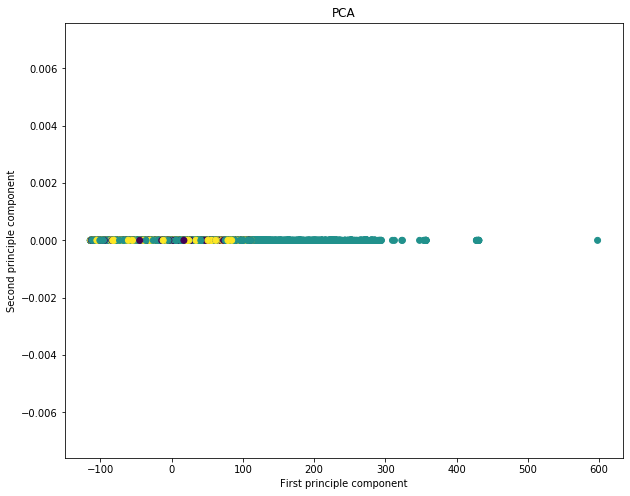

In [121]:
plt.figure(figsize=(10,8))
plt.scatter(pc_train[:,0],pc_train[:,35],c=y_train)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.title('PCA')

In [143]:
pc_train11=pd.DataFrame(pc_train[:,0])
pc_train12=pd.DataFrame(pc_train[:,41])

pc_train11['pc2']=pc_train12
pc_train11
pc_train11 =pc_train11.rename(columns = {'0':'pc0'}, inplace = False)
pc_train11

,0,pc2
0,-68.793779,3.389825e-15
1,-73.891602,-4.146480e-14
2,-107.111801,6.234162e-14
3,-98.068504,-2.208995e-14
4,-96.663587,9.535313e-14
...,...,...
27494,-73.132457,-4.381443e-16
27495,17.212451,3.685307e-15
27496,-100.828489,-9.241096e-15
27497,-11.898577,2.018506e-15


In [103]:
#pc_train1=pc_train[:,0],pc_train[:,35]
X_train1, X_test1, y_train1, y_test1 = train_test_split(pc_train1, y_train, test_size = 0.2, random_state =1)

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np

linear = svm.SVC(kernel='sigmoid').fit(X_train1, y_train1)
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .1
X = np.concatenate((X_train1, X_test1))
y=np.concatenate((y_train1,y_test1))

from sklearn.metrics import confusion_matrix

linear_pred = linear.predict(X_test1)
cm_lin = confusion_matrix(y_test, linear_pred)
print(cm_lin)
accuracy_lin = linear.score(X_test1, y_test1)
print(accuracy_lin)

[[  38  331   40]
 [ 396 3198  727]
 [  63  625   82]]
0.6032727272727273


In [104]:
from sklearn.metrics import f1_score
f1_score(y_test1, linear_pred, average='macro')

0.31329085739106344

Text(0.5, 1.0, 'PCA')

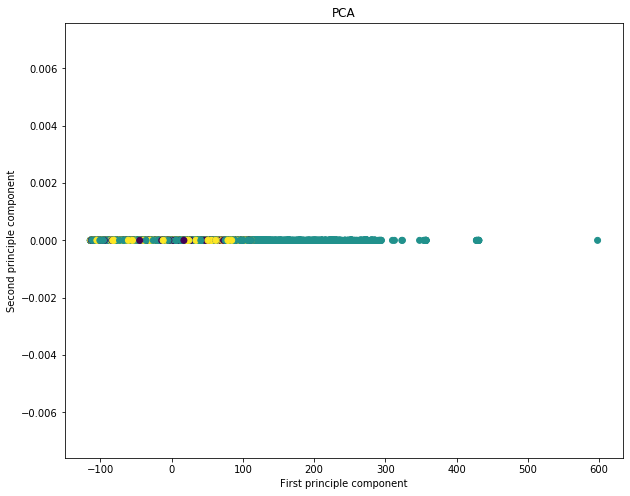

In [380]:
plt.figure(figsize=(10,8))
plt.scatter(pc_train[:,0],pc_train[:,41],c=y_train)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.title('PCA')

In [ ]:
pc_train1=pd.DataFrame(pc_train[:,0],pc_train[:,41])
X_train1, X_test1, y_train1, y_test1 = train_test_split(pc_train1, y_train, test_size = 0.2, random_state =1)

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np

linear = svm.SVC(kernel='linear').fit(X_train1, y_train1)
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .1
X = np.concatenate((X_train1, X_test1))
y=np.concatenate((y_train1,y_test1))

from sklearn.metrics import confusion_matrix

linear_pred = linear.predict(X_test1)
cm_lin = confusion_matrix(y_test, linear_pred)
print(cm_lin)
accuracy_lin = linear.score(X_test1, y_test1)
print(accuracy_lin)

In [114]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=2)
x_lda=lda.fit(OH_X_train,y_train).transform(OH_X_train)
x_lda

array([[ 0.59814189, -0.70868435],
       [ 0.96709082, -0.12398776],
       [ 0.70222005,  0.48273005],
       ...,
       [-0.38316908, -2.02115259],
       [-1.81160813, -0.20103869],
       [-0.57844999,  0.67557462]])

In [110]:
x_lda[:,0].shape()

TypeError: 'tuple' object is not callable

Text(0.5, 1.0, 'LDA')

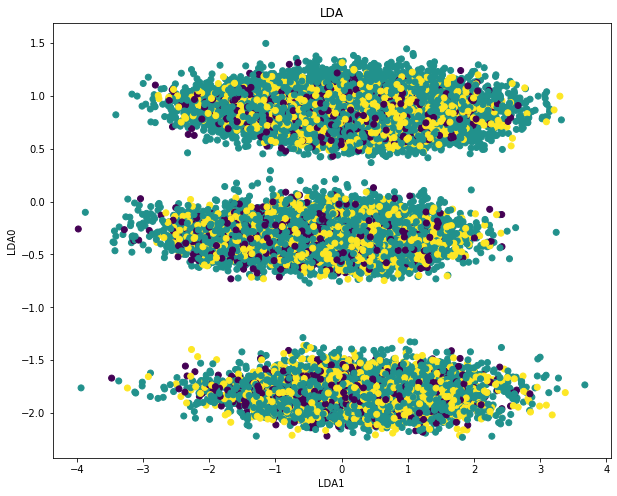

In [116]:
plt.figure(figsize=(10,8))
plt.scatter(x_lda[:,1],x_lda[:,0],c=y_train)
plt.xlabel('LDA1')
plt.ylabel('LDA0')
plt.title('LDA')

In [146]:
scaler=StandardScaler()
scaler.fit(OH_X_train)
#scaled_data=scaler.transform(OH_X_train)
pca = PCA(n_components=42)
pc_train = pca.fit_transform(OH_X_train)

#scaled_test=scaler.transform(OH_X_valid)
pc_test=pca.transform(OH_X_valid)
X_train1=pd.DataFrame(pc_train[:,0],pc_train[:,41])
X_test1=pd.DataFrame(pc_test[:,0],pc_test[:,41])

pc_train11=pd.DataFrame(pc_train[:,0])
pc_train12=pd.DataFrame(pc_train[:,41])

pc_test11=pd.DataFrame(pc_test[:,0])
pc_test12=pd.DataFrame(pc_test[:,41])

pc_train11['pc2']=pc_train12
pc_test11['pc2']=pc_test12

X_train1=pc_train11
X_test1=pc_test11


In [159]:
#pc_train1=pc_train[:,0],pc_train[:,35]

y_train1=y_train
y_test1=y_valid


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np

linear = svm.SVC(kernel='sigmoid').fit(X_train1, y_train1)
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it


from sklearn.metrics import confusion_matrix

linear_pred = linear.predict(X_test1)
cm_lin = confusion_matrix(y_test, linear_pred)
print(cm_lin)
accuracy_lin = linear.score(X_test1, y_test1)
print(accuracy_lin)

ValueError: Found input variables with inconsistent numbers of samples: [5500, 2749]

Using matplotlib backend: Qt5Agg


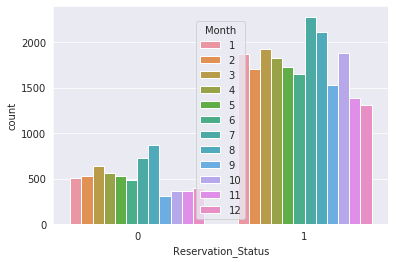

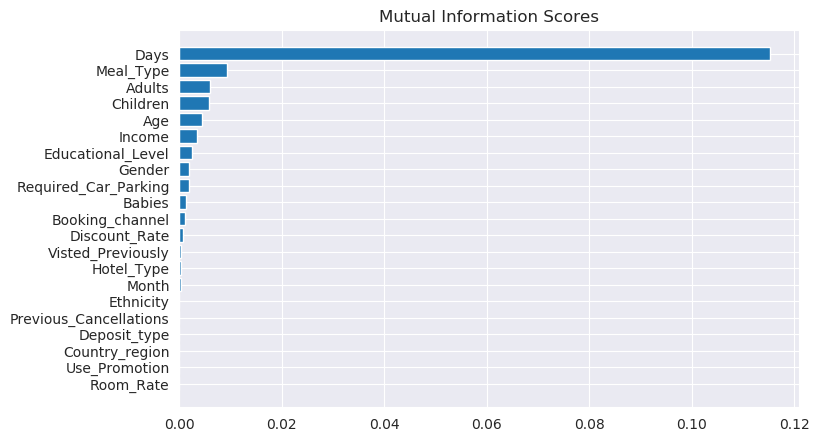

In [167]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

%matplotlib 
import math

df=pd.read_csv(r'/home/tharaka/kagglecompetition/data-storm-20/Hotel-A-train.csv')
#df=df['Expected_checkin'rint()].dtype

tab1 = df['Gender'].unique()
#tab1.sort()
df['Gender']=pd.get_dummies(df['Gender'],drop_first=True)

tab2 = df['Ethnicity'].unique()
#print(tab2)
df['Ethnicity']=pd.get_dummies(df['Ethnicity'],drop_first=True)

tab3 = df['Educational_Level'].unique()
#print(tab3)
df['Educational_Level']=pd.get_dummies(df['Educational_Level'],drop_first=True)

tab4 = df['Income'].unique()
#print(tab4)
df['Income']=pd.get_dummies(df['Income'],drop_first=True)


tab5 = df['Country_region'].unique()
#print(tab5)
df['Country_region']=pd.get_dummies(df['Country_region'],drop_first=True)

tab6 = df['Hotel_Type'].unique()
#print(tab6)
df['Hotel_Type']=pd.get_dummies(df['Hotel_Type'],drop_first=True)

#df['Expected_checkin'] = pd.to_datetime(df['Expected_checkin'], format="%d/%m/%y")
df['Expected_checkin'] = pd.to_datetime(df['Expected_checkin'],infer_datetime_format=True)
df['Expected_checkout'] = pd.to_datetime(df['Expected_checkout'],infer_datetime_format=True)
df['Booking_date'] = pd.to_datetime(df['Booking_date'],infer_datetime_format=True)

#day_of_month = df['Expected_checkin'].dt.day
df['Arrival_duration']= df['Expected_checkin']-df['Booking_date']

#df['a'] = df.Arrival_duration.dt.days
#sns.countplot(x="target",hue=a, data=df)
#sns.countplot(x=a,data=df)
#sns.boxplot(x="target",y="a",data=df)

df['Days'] = df.Arrival_duration.dt.days
df['Month'] = df.Expected_checkin.dt.month

tab7 = df['Meal_Type'].unique()
#print(tab7)
df['Meal_Type']=pd.get_dummies(df['Meal_Type'],drop_first=True)

tab8 = df['Visted_Previously'].unique()
#print(tab8)
df['Visted_Previously']=pd.get_dummies(df['Visted_Previously'],drop_first=True)

tab9 = df['Previous_Cancellations'].unique()
#print(tab9)
df['Previous_Cancellations']=pd.get_dummies(df['Previous_Cancellations'],drop_first=True)

tab10 = df['Deposit_type'].unique()
#print(tab10)
df['Deposit_type']=pd.get_dummies(df['Deposit_type'],drop_first=True)

tab11 = df['Booking_channel'].unique()
#print(tab11)
df['Booking_channel']=pd.get_dummies(df['Booking_channel'],drop_first=True)

tab12 = df['Required_Car_Parking'].unique()
#print(tab12)
df['Required_Car_Parking']=pd.get_dummies(df['Required_Car_Parking'],drop_first=True)

tab13 = df['Reservation_Status'].unique()
#print(tab13)
df['Reservation_Status']=pd.get_dummies(df['Reservation_Status'],drop_first=True)

tab14 = df['Use_Promotion'].unique()
#print(tab14)
df['Use_Promotion']=pd.get_dummies(df['Use_Promotion'],drop_first=True)


df2=df.drop(["Reservation-id","Expected_checkout","Expected_checkin","Arrival_duration","Booking_date"],axis=1)


#sns.boxplot(x="Reservation_Status",y="Hotel_Type",data=df)
#sns.countplot(x="Reservation_Status",hue="Gender",data=df2)
#sns.countplot(x="Reservation_Status",hue="Ethnicity",data=df2)

sns.set_style('darkgrid')
#sns.lmplot('Days','Hotel_Type',data=df2, hue='Reservation_Status',size=6,aspect=1,fit_reg=False)
#sns.lmplot('Outstate','F.Undergrad',data=college_data, hue='Private',size=6,aspect=1,fit_reg=False)

#sns.kdeplot(data=df2['Stay'], label="Days", shade=True)
#sns.lmplot('Days','Stay',data=df2, hue='Reservation_Status',size=6,aspect=1,fit_reg=False)

df3=df2[df2['Days']<450]
#df4=df3[df3['Days']>0]
sns.countplot(x="Reservation_Status",hue="Month",data=df3)
#sns.lmplot('Month','Use_Promotion',data=df3, hue='Reservation_Status',size=6,aspect=1,fit_reg=False)
#sns.scatterplot(x=df3['Month'], y=df3['Use_Promotion'], hue=df3['Reservation_Status'])

X = df3.copy()
y = X.pop("Reservation_Status")
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    
discrete_features = X.dtypes == int 

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)


In [170]:
df

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Arrival_duration,Days,Month
0,39428300,0,40,0,1,0,1,1,2015-07-01,2015-07-02,...,0,0,1,1,1,10,218,41 days,41,7
1,77491756,0,49,0,0,1,0,1,2015-07-01,2015-07-02,...,0,0,1,1,0,0,185,36 days,36,7
2,73747291,0,42,0,1,0,0,1,2015-07-02,2015-07-06,...,0,0,1,1,0,0,119,3 days,3,7
3,67301739,1,25,0,0,0,0,0,2015-07-02,2015-07-03,...,0,0,1,1,1,5,144,12 days,12,7
4,77222321,0,62,0,0,0,0,0,2015-07-03,2015-07-04,...,0,1,0,1,1,10,242,13 days,13,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,0,49,0,0,0,0,1,2016-08-31,2016-09-01,...,0,0,1,1,1,10,100,37 days,37,8
27495,56414525,0,49,1,0,0,0,0,2016-08-31,2016-09-01,...,0,0,1,0,1,40,194,127 days,127,8
27496,52023375,0,49,0,0,1,0,0,2016-09-01,2016-09-02,...,0,1,1,1,1,5,202,9 days,9,9
27497,98041387,1,65,0,0,0,0,0,2016-08-31,2016-09-01,...,0,0,0,0,1,20,157,98 days,98,8


In [195]:
sns.lmplot('Visted_Previously','Previous_Cancellations',data=dataset2, hue='Reservation_Status',size=6,aspect=1,fit_reg=False)